# Familiarising with the Julia language and the Catalyst package

This notebook contains some notes on the Julia programming language and the Catalyst package for defining and simulating reaction networks. It is not intended to be a comprehensive introduction to either, but rather a brief overview to get you started.

This is adapted from [Introduction to Catalyst](https://docs.sciml.ai/Catalyst/stable/introduction_to_catalyst/catalyst_for_new_julia_users/)

In [2]:
using Pkg

# 1) Work in a clean env (pick one)
# Pkg.activate(mktempdir())          # throwaway
Pkg.activate("/home/ianyang/stochastic_simulations/src/julia")

# 2) Make sure registries are current
Pkg.Registry.update()

# 3) Install packages 
Pkg.add(["Catalyst", "OrdinaryDiffEqDefault", "Plots"])  

# 4) Resolve everything (dependency and conflict resolution )
Pkg.resolve()

  Activating project at `~/stochastic_simulations/src/julia`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/stochastic_simulations/src/julia/Project.toml`
  No Changes to `~/stochastic_simulations/src/julia/Manifest.toml`
Precompiling project...
  22924.8 ms  ✓ HomotopyContinuation
   9508.6 ms  ✓ Catalyst → CatalystHomotopyContinuationExtension
  2 dependencies successfully precompiled in 35 seconds. 585 already precompiled.
  No Changes to `~/stochastic_simulations/src/julia/Project.toml`
  No Changes to `~/stochastic_simulations/src/julia/Manifest.toml`


--------------------------------------------------------------
Start from here if the packages are already installed
--------------------------------------------------------------

In [ ]:
using Pkg

# 1) Work in a clean env (pick one)
# Pkg.activate(mktempdir())          # throwaway
Pkg.activate("/home/ianyang/stochastic_simulations/src/julia")         
using Catalyst
using OrdinaryDiffEqDefault
using Plots

  Activating project at `~/stochastic_simulations/julia`
[ Info: Precompiling Catalyst [479239e8-5488-4da2-87a7-35f2df7eef83] (cache misses: wrong dep version loaded (2), incompatible header (2), dep missing source (2))
[ Info: Precompiling OrdinaryDiffEqDefault [50262376-6c5a-4cf5-baba-aaf4f84d72d7] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (4), incompatible header (2))
[ Info: Precompiling SparseMatrixColoringsColorsExt [42e6ba4b-6785-530d-add2-80af3b5b757b] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling SpecialFunctionsExt [997ecda8-951a-5f50-90ea-61382e97704b] (cache misses: wrong dep version loaded (4), incompatible header (2))
[ Info: Precompiling UnitfulExt [0e51ec96-f580-5f12-a625-1297083d7970] (cache misses: wrong dep version loaded (4), incompatible header (2))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong

In [4]:
# birth-death model
rn = @reaction_network begin
    b, 0 --> X
    d, X --> 0
end

Model ##ReactionSystem#237:
Unknowns (1): see unknowns(##ReactionSystem#237)
  X(t)
Parameters (2): see parameters(##ReactionSystem#237)
  b
  d

In [ ]:
# initial conditions, i.e. conc or copy numbers of each specicies at the start of the simulation
u0 = [:X => 1.0]

1-element Vector{Pair{Symbol, Float64}}:
 :X => 1.0

In [ ]:
# timespan of the simulation
tspan = (0.0, 10.0)

(0.0, 10.0)

In [ ]:
# parameter values
params = [:b => 1.0, :d => 0.2]

2-element Vector{Pair{Symbol, Float64}}:
 :b => 1.0
 :d => 0.2

In [ ]:
# set up the ODE problem
oprob = ODEProblem(rn, u0, tspan, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 10.0)
u0: 1-element Vector{Float64}:
 1.0

In [9]:
sol = solve(oprob)

retcode: Success
Interpolation: 3rd order Hermite
t: 8-element Vector{Float64}:
  0.0
  0.10458485969007832
  0.7374600576368241
  1.8765186010339545
  3.326441898274736
  5.200057179657693
  7.487552836339847
 10.0
u: 8-element Vector{Vector{Float64}}:
 [1.0]
 [1.0827989176094226]
 [1.5485226736963285]
 [2.2516776896410655]
 [2.94349883404974]
 [3.586196656299412]
 [4.105252550819238]
 [4.458655579198203]

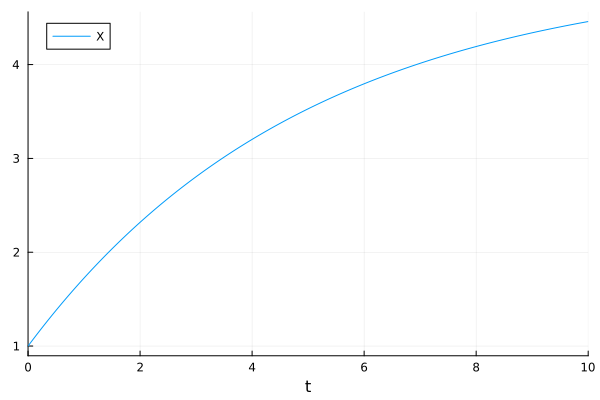

In [10]:
plot(sol)

# Simulate gillespie algorithm (SIR Model Example)

In [11]:
Pkg.add("JumpProcesses")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/stochastic_simulations/julia/Project.toml`
  No Changes to `~/stochastic_simulations/julia/Manifest.toml`
Precompiling project...
   2391.7 ms  ✓ OpenSSL
   7004.1 ms  ✓ ExponentialUtilities → ExponentialUtilitiesStaticArraysExt
   7014.7 ms  ✓ FastGaussQuadrature
  20725.1 ms  ✓ Qt6ShaderTools_jll
  21587.9 ms  ✓ OrdinaryDiffEqFunctionMap
   1696.6 ms  ✓ OrdinaryDiffEqQPRK
  22405.9 ms  ✓ OrdinaryDiffEqHighOrderRK
  15564.3 ms  ✓ OrdinaryDiffEqRKN
  25349.7 ms  ✓ OrdinaryDiffEqSSPRK
   4140.4 ms  ✓ OrdinaryDiffEqLowStorageRK
  29849.8 ms  ✓ OrdinaryDiffEqPRK
  32045.2 ms  ✓ OrdinaryDiffEqLinear
  32161.2 ms  ✓ OrdinaryDiffEqSymplecticRK
  33260.5 ms  ✓ OrdinaryDiffEqLowOrderRK
   1674.6 ms  ✓ Qt6Declarative_jll
    589.0 ms  ✓ Qt6Wayland_jll
  34791.8 ms  ✓ OrdinaryDiffEqStabilizedRK
   1998.3 ms  ✓ OrdinaryDiffEqAdamsBashforthMoulton
  12426.8 ms  ✓ HTTP
  42012.4 ms  ✓ Ord

In [12]:
using JumpProcesses

In [13]:
sir_model = @reaction_network begin
    b, S + I --> 2I
    k, I --> R
end

Model ##ReactionSystem#244:
Unknowns (3): see unknowns(##ReactionSystem#244)
  S(t)
  I(t)
  R(t)
Parameters (2): see parameters(##ReactionSystem#244)
  b
  k

In [14]:
u0 = [:S => 50, :I => 1, :R => 0]
tspan = (0.0, 10.0)
params = [:b => 0.2, :k => 1.0]

2-element Vector{Pair{Symbol, Float64}}:
 :b => 0.2
 :k => 1.0

In [16]:
jinput = JumpInputs(sir_model, u0, tspan, params)
jprob = JumpProblem(jinput)

JumpProblem with problem DiscreteProblem with aggregator Direct
Number of jumps with discrete aggregation: 0
Number of jumps with continuous aggregation: 0
Number of mass action jumps: 2


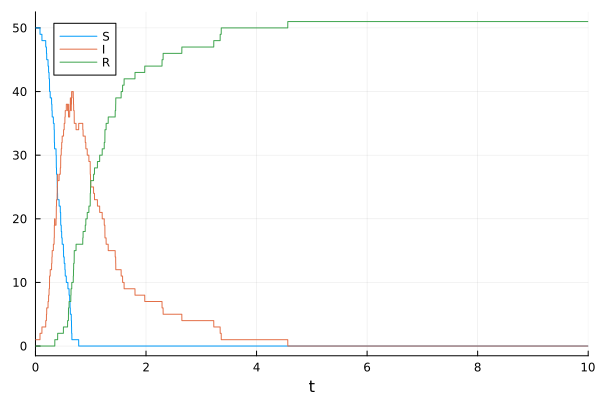

In [17]:
sol = solve(jprob)
plot(sol)

-----

In [32]:
# The Latexify.jl package (which enables e.g. displaying Catalyst models in Latex format)
Pkg.add("Latexify")

   Resolving package versions...
    Updating `~/stochastic_simulations/julia/Project.toml`
  [23fbe1c1] + Latexify v0.16.10
  No Changes to `~/stochastic_simulations/julia/Manifest.toml`


In [ ]:
using Latexify

In [34]:
# get a list of all packages available in your current environment using:
Pkg.status()

Status `~/stochastic_simulations/julia/Project.toml`
  [479239e8] Catalyst v15.0.8
  [ccbc3e58] JumpProcesses v9.19.1
  [23fbe1c1] Latexify v0.16.10
  [1dea7af3] OrdinaryDiffEq v6.102.1
  [50262376] OrdinaryDiffEqDefault v1.8.0
⌃ [91a5bcdd] Plots v1.40.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


Some additional useful Pkg commands are:

- ``Pkg.rm("PackageName")`` removes a package from the current environment.
- ``Pkg.update("PackageName")`` updates the designated package.
- ``Pkg.update()`` updates all packages.

In [35]:
Pkg.update()

    Updating registry at `~/.julia/registries/General.toml`
   Installed Adapt ─── v4.4.0
   Installed Unitful ─ v1.25.0
   Installed Plots ─── v1.41.1
    Updating `~/stochastic_simulations/julia/Project.toml`
  [91a5bcdd] ↑ Plots v1.40.20 ⇒ v1.41.1
    Updating `~/stochastic_simulations/julia/Manifest.toml`
  [79e6a3ab] ↑ Adapt v4.3.0 ⇒ v4.4.0
  [91a5bcdd] ↑ Plots v1.40.20 ⇒ v1.41.1
  [1986cc42] ↑ Unitful v1.24.0 ⇒ v1.25.0
  [45397f5d] - UnitfulLatexify v1.7.0
Precompiling project...
    331.8 ms  ✓ Adapt
    426.0 ms  ✓ Adapt → AdaptSparseArraysExt
    465.6 ms  ✓ Adapt → AdaptStaticArraysExt
  15080.9 ms  ✓ Unitful
    690.5 ms  ✓ Unitful → ForwardDiffExt
    774.7 ms  ✓ Unitful → InverseFunctionsUnitfulExt
    776.5 ms  ✓ Unitful → ConstructionBaseUnitfulExt
    824.3 ms  ✓ Unitful → PrintfExt
  17908.5 ms  ✓ OrdinaryDiffEqStabilizedRK
  18174.8 ms  ✓ OrdinaryDiffEqSSPRK
  18323.1 ms  ✓ OrdinaryDiffEqLowStorageRK
   5127.3 ms  ✓ Unitful → LatexifyExt
  21831.8 ms  ✓ LinearSolve
  